# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Battery B0018

In [2]:
df = pd.read_csv('C:/Users/ibrah/Desktop/Masters/Dissertation Data Analysis - VS Code/vars_b18.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314676 entries, 0 to 314675
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 314676 non-null  int64  
 1   cycle_type            314676 non-null  int64  
 2   cycle_idx             314676 non-null  int64  
 3   index                 314676 non-null  int64  
 4   type                  314676 non-null  object 
 5   ambient_temperature   314676 non-null  int64  
 6   timestamp             314676 non-null  object 
 7   Voltage_measured      314674 non-null  float64
 8   Current_measured      314674 non-null  float64
 9   Temperature_measured  314674 non-null  float64
 10  Current               314676 non-null  float64
 11  Voltage               314676 non-null  float64
 12  Time                  314676 non-null  float64
 13  Capacity              312497 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 33.

In [4]:
df.isna().sum()

cycle                      0
cycle_type                 0
cycle_idx                  0
index                      0
type                       0
ambient_temperature        0
timestamp                  0
Voltage_measured           2
Current_measured           2
Temperature_measured       2
Current                    0
Voltage                    0
Time                       0
Capacity                2179
dtype: int64

In [5]:
# Data Interpolation to deal with Nan Values in the registries of cycle 46 and 57
df = df.interpolate(method="linear")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\2912185075.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear")


In [6]:
df

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-07-07 12:26:45.750,3.865713,0.001014,23.735721,0.0000,-0.007,0.000,1.855005
1,1,1,0,1,charge,24,2008-07-07 12:26:45.750,3.447651,-4.034445,23.743956,-4.0360,1.553,2.484,1.855005
2,1,1,0,2,charge,24,2008-07-07 12:26:45.750,4.005559,1.517435,23.773723,1.5070,4.721,5.109,1.855005
3,1,1,0,3,charge,24,2008-07-07 12:26:45.750,4.015989,1.514558,23.777077,1.5070,4.737,7.562,1.855005
4,1,1,0,4,charge,24,2008-07-07 12:26:45.750,4.023230,1.517284,23.792710,1.5070,4.743,10.062,1.855005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314671,266,132,318,195,discharge,24,2008-08-20 08:37:19.515,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,1.341051
314672,266,132,318,196,discharge,24,2008-08-20 08:37:19.515,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,1.341051
314673,266,132,318,197,discharge,24,2008-08-20 08:37:19.515,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,1.341051
314674,266,132,318,198,discharge,24,2008-08-20 08:37:19.515,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,1.341051


In [7]:
df.query("cycle_type == 57").isna().sum()

cycle                   0
cycle_type              0
cycle_idx               0
index                   0
type                    0
ambient_temperature     0
timestamp               0
Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current                 0
Voltage                 0
Time                    0
Capacity                0
dtype: int64

In [8]:
df.query("cycle_type == 57")

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
163093,112,57,137,0,charge,24,2008-07-31 15:20:13.937,3.659437,-0.003504,22.904104,0.0000,-0.007,0.000,1.605768
163094,112,57,137,1,charge,24,2008-07-31 15:20:13.937,3.310233,-3.813224,22.914346,-3.8140,1.504,2.453,1.605799
163095,112,57,137,2,charge,24,2008-07-31 15:20:13.937,3.763274,1.514256,22.962657,1.5070,4.484,7.203,1.605830
163096,112,57,137,3,charge,24,2008-07-31 15:20:13.937,3.785536,1.514492,23.006446,1.5070,4.511,11.797,1.605861
163097,112,57,137,4,charge,24,2008-07-31 15:20:13.937,3.798694,1.514953,23.033500,1.5070,4.521,16.406,1.605892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168301,116,57,142,274,discharge,24,2008-08-01 21:32:12.937,3.314164,-0.002461,35.300242,0.0006,0.000,3143.672,1.640435
168302,116,57,142,275,discharge,24,2008-08-01 21:32:12.937,3.324785,0.000556,35.121077,0.0006,0.000,3155.516,1.640435
168303,116,57,142,276,discharge,24,2008-08-01 21:32:12.937,3.334352,0.000477,34.958229,0.0006,0.000,3167.359,1.640435
168304,116,57,142,277,discharge,24,2008-08-01 21:32:12.937,3.343416,0.000271,34.799742,0.0006,0.000,3179.203,1.640435


In [9]:
#View only one registry per cycle (charge and discharge) - Um dos factores de seleção e eliminação
cycles = df.filter(['cycle','cycle_type','type','timestamp']).drop_duplicates()
cycles

,cycle,cycle_type,type,timestamp
0,1,1,charge,2008-07-07 12:26:45.750
2816,2,1,discharge,2008-07-07 15:15:28.875
3182,3,2,charge,2008-07-07 18:20:14.250
6959,4,2,discharge,2008-07-07 21:53:06.125
7321,5,3,charge,2008-07-07 23:23:14.531
...,...,...,...,...
311208,262,130,discharge,2008-08-20 00:43:05.406
311410,263,133,charge,2008-08-20 02:06:37.718
312876,264,131,discharge,2008-08-20 05:02:00.296
313077,265,134,charge,2008-08-20 05:49:31.828


In [10]:
cap = df.filter(['cycle_type', 'Capacity']).groupby('cycle_type').last()
cap

,Capacity
cycle_type,
1,1.855005
2,1.843196
3,1.839602
4,1.830674
5,1.832700
...,...
130,1.351865
131,1.354797
132,1.341051


# Charge Cycle Variables

list of charge Variables:
1 Voltage_measured
2 Voltage_time_relationship
3 Current_measured
4 Current_measured_time_relationship
5 Temperature_measured
6 Temperature_measured_time_relationship
7 Current_charge
8 Current_charge_time_relationship
9 Voltage_charge
10 Voltage_charge_time_relationship
11 max_time_per_charge_cycle

In [15]:
# Charge cycles
ch = df.query('type =="charge"')
ch

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-07-07 12:26:45.750,3.865713,0.001014,23.735721,0.000,-0.007,0.000,1.855005
1,1,1,0,1,charge,24,2008-07-07 12:26:45.750,3.447651,-4.034445,23.743956,-4.036,1.553,2.484,1.855005
2,1,1,0,2,charge,24,2008-07-07 12:26:45.750,4.005559,1.517435,23.773723,1.507,4.721,5.109,1.855005
3,1,1,0,3,charge,24,2008-07-07 12:26:45.750,4.015989,1.514558,23.777077,1.507,4.737,7.562,1.855005
4,1,1,0,4,charge,24,2008-07-07 12:26:45.750,4.023230,1.517284,23.792710,1.507,4.743,10.062,1.855005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314471,265,134,317,1394,charge,24,2008-08-20 05:49:31.828,4.180760,-0.001612,23.160264,0.000,-0.007,9956.984,1.341051
314472,265,134,317,1395,charge,24,2008-08-20 05:49:31.828,4.181660,-0.002837,23.166556,0.000,-0.007,9964.031,1.341051
314473,265,134,317,1396,charge,24,2008-08-20 05:49:31.828,4.182311,-0.002382,23.163557,0.000,-0.007,9971.078,1.341051
314474,265,134,317,1397,charge,24,2008-08-20 05:49:31.828,4.182857,-0.002210,23.153626,0.000,-0.007,9978.125,1.341051


## Voltage measured VS Time - Charge

In [17]:
# Group the data by "cycle" and find the maximum voltage measured and its corresponding time
# max_values = ch.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
max_values = ch[ch['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
#max_values = ch[ch['Time']].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
# Reset the index of the resulting DataFrame
max_values.reset_index(drop=True, inplace=True)

# Extract the maximum voltage measured and time values
max_voltages = max_values['Voltage_measured']
max_time = max_values['Time']

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\1454548175.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = ch[ch['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])


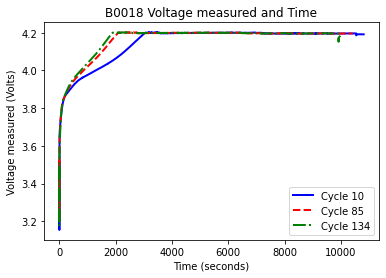

In [18]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_134 = ch[ch['cycle_type'] == 134]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_134['Time'], cycle_134['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 134')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured (Volts)')
plt.title('B0018 Voltage measured and Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [19]:
#cycle_type_C = cycle type charge
#Time_VMC = Time voltage measured Charge
#type_C = Type Charge
#Voltage_measured_C
v1v2 = max_values[['cycle_type', 'type', 'Voltage_measured', 'Time']].copy()
v1v2.rename(columns={'type': 'type_C', 'Voltage_measured': 'Voltage_measured_C', 'Time': 'Time_Voltage_Measured_C'}, inplace=True)
v1v2

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C
0,1,charge,4.202872,1090.812
1,2,charge,4.201895,3555.328
2,3,charge,4.201918,3550.750
3,4,charge,4.202093,3404.391
4,5,charge,4.202265,3513.672
...,...,...,...,...
129,130,charge,4.203554,2425.235
130,131,charge,4.204756,2608.359
131,132,charge,4.203718,2486.968
132,133,charge,4.203241,2556.312


In [20]:
#Check data type
v1v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               134 non-null    int64  
 1   type_C                   134 non-null    object 
 2   Voltage_measured_C       134 non-null    float64
 3   Time_Voltage_Measured_C  134 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


## Current Measured vs Time - Charge

In [ ]:
cycle_list = np.arange(1,135).tolist()

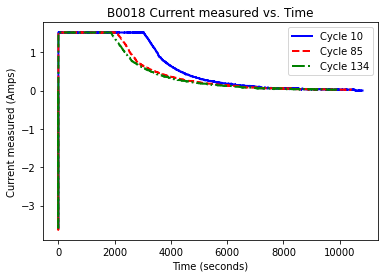

In [22]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_134 = ch[ch['cycle_type'] == 134]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_134['Time'], cycle_134['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 134')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured (Amps)')
plt.title('B0018 Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v3v4 = pd.DataFrame(columns=['cycle_type','break_time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch[ch['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v3v4.loc[idx,'cycle_type']=c
    v3v4.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v3v4.loc[idx,'break_current']=cycle.query('index==@change_point_index').iloc[0,8]
    
v3v4.rename(columns={'break_time':'Current_measured_time_C', 'break_current':'Current_measured_C'}, inplace = True)

In [25]:
#Change data type
v3v4['cycle_type'] = v3v4['cycle_type'].astype('int64')
v3v4[['Current_measured_time_C', 'Current_measured_C']] = v3v4[['Current_measured_time_C', 'Current_measured_C']].astype('float64')
v3v4

,cycle_type,Current_measured_time_C,Current_measured_C
0,1,615.828,1.515859
1,2,3180.188,1.513445
2,3,3178.188,1.514422
3,4,3157.656,1.487504
4,5,3126.344,1.516403
...,...,...,...
129,130,1927.110,1.516242
130,131,1936.125,1.482935
131,132,1907.250,1.518581
132,133,1779.609,1.517406


In [26]:
#Check data type
v3v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               134 non-null    int64  
 1   Current_measured_time_C  134 non-null    float64
 2   Current_measured_C       134 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.3 KB


## Temperature Measured vs Time - Charge

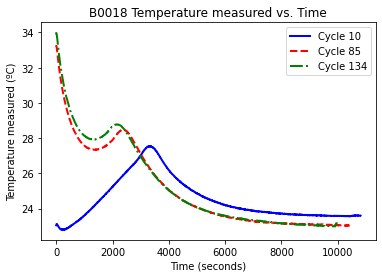

In [27]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_134 = ch[ch['cycle_type'] == 134]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_134['Time'], cycle_134['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 134')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured (ºC)')
plt.title('B0018 Temperature measured vs. Time')


# Add a legend
plt.legend()

# Display the plot
plt.show()

In [28]:
# Group the data by "cycle" and find the maximum temperature measured and its corresponding time
#tm = temperature measured
#Time_TMC = Time temperature meausred
tm = ch[ch['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v5v6 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v5v6.rename(columns={'type':'type_C','Temperature_measured':'Temperature_measured_C','Time':'Time_temperature_measured_C'}, inplace=True)
v5v6

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\3287813299.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ch[ch['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_C,Temperature_measured_C,Time_temperature_measured_C
0,1,charge,26.648851,1000.359
1,2,charge,28.630658,3451.813
2,3,charge,28.510311,3429.984
3,4,charge,27.947430,3391.531
4,5,charge,28.182350,3393.797
...,...,...,...,...
129,130,charge,28.841919,2217.719
130,131,charge,29.320361,2199.828
131,132,charge,29.368555,2165.250
132,133,charge,28.313325,2195.156


In [29]:
v5v6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   134 non-null    int64  
 1   type_C                       134 non-null    object 
 2   Temperature_measured_C       134 non-null    float64
 3   Time_temperature_measured_C  134 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


## Current at Charge vs Time - Charge

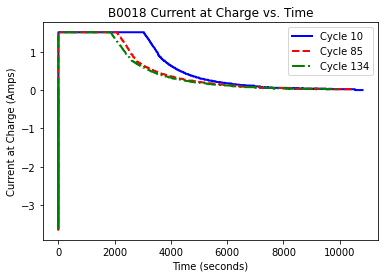

In [30]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_134 = ch[ch['cycle_type'] == 134]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_134['Time'], cycle_134['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 134')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge (Amps)')
plt.title('B0018 Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Time_CaC = time current at charge
v7v8 = pd.DataFrame(columns=['cycle_type','Time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch[ch['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v7v8.loc[idx,'cycle_type']=c
    v7v8.loc[idx,'Time']=cycle.query('index==@change_point_index').iloc[0,12]
    v7v8.loc[idx,'break_current_at_charge']=cycle.query('index==@change_point_index').iloc[0,10]

v7v8.rename(columns={'Time':'Time_current_C', 'break_current_at_charge':'Current_C'},inplace=True)

In [33]:
#Change data type
v7v8['cycle_type'] = v7v8['cycle_type'].astype('int64')
v7v8['Time_current_C'] = v7v8['Time_current_C'].astype('float64')
v7v8

,cycle_type,Time_current_C,Current_C
0,1,629.906,1.470
1,2,3194.938,1.479
2,3,3178.188,1.507
3,4,3157.656,1.478
4,5,3141.797,1.479
...,...,...,...
129,130,1961.907,1.459
130,131,1936.125,1.474
131,132,1942.484,1.441
132,133,1814.703,1.468


In [34]:
#Check data type
v7v8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      134 non-null    int64  
 1   Time_current_C  134 non-null    float64
 2   Current_C       134 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.3 KB


## Voltage at charge vs time - Charge

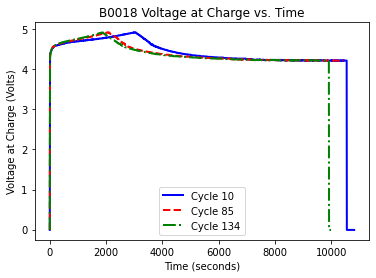

In [35]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_134 = ch[ch['cycle_type'] == 134]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_134['Time'], cycle_134['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 134')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge (Volts)')
plt.title('B0018 Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [36]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ch.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v9v10 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v9v10.rename(columns={'type':'type_C','Voltage':'Voltage_C','Time':'Time_Voltage_C'}, inplace=True)
v9v10 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\2382722715.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ch.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])


,cycle_type,type_C,Voltage_C,Time_Voltage_C
0,1,charge,4.926,618.500
1,2,charge,4.926,3141.391
2,3,charge,4.926,3163.953
3,4,charge,4.926,3145.703
4,5,charge,4.932,3123.391
...,...,...,...,...
129,130,charge,4.926,1920.360
130,131,charge,4.926,1908.469
131,132,charge,4.926,1900.437
132,133,charge,4.926,1765.922


In [37]:
#Check data type
v9v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      134 non-null    int64  
 1   type_C          134 non-null    object 
 2   Voltage_C       134 non-null    float64
 3   Time_Voltage_C  134 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


## Total Time per charge cycle

In [38]:
#Total time Charge var
# Group the DataFrame by "cycle" and select the maximum value of "time_seconds"
chr_total_time = ch.groupby('cycle_type')['Time'].max()

t_tm = []
# Print the maximum time for each cycle
for cycle, chr_total_time in chr_total_time.items():
    Cycle = cycle
    chr_total_time = chr_total_time
    t_tm.append([Cycle,chr_total_time])

v11 = pd.DataFrame(t_tm, columns=['cycle_type', 'Charge Total Time'])
# t_t.rename(columns={'cycle_type':'cycle_type'},inplace=True)
v11

,cycle_type,Charge Total Time
0,1,8122.844
1,2,10804.766
2,3,10806.391
3,4,10805.953
4,5,10806.594
...,...,...
129,130,10083.016
130,131,10090.813
131,132,9930.265
132,133,10440.172


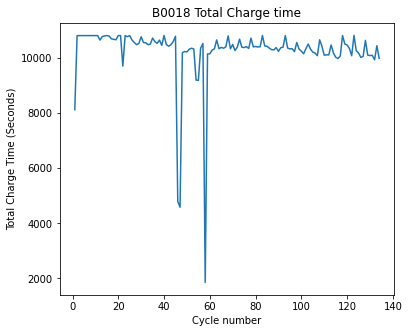

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.plot(v11['cycle_type'], v11['Charge Total Time'])
# Set labels and title
plt.xlabel('Cycle number')
plt.ylabel('Total Charge Time (Seconds)')
plt.title('B0018 Total Charge time')

# Display the plot
plt.show()

In [40]:
#Check data type
v11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_type         134 non-null    int64  
 1   Charge Total Time  134 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


## All Charge Variables

In [42]:
cap["cycle_type"] = cap.index
cap.reset_index(drop=True, inplace=True)
cap

,Capacity,cycle_type
0,1.855005,1
1,1.843196,2
2,1.839602,3
3,1.830674,4
4,1.832700,5
...,...,...
129,1.351865,130
130,1.354797,131
131,1.341051,132
132,1.354797,133


In [43]:
merge_= ['cycle_type'] 

In [44]:
acv = pd.merge(v1v2, v3v4[merge_ + ["Current_measured_time_C", "Current_measured_C"]], how = "outer", on="cycle_type")
acv = pd.merge(acv, v5v6[merge_ +['Temperature_measured_C', 'Time_temperature_measured_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v7v8[merge_ +['Current_C', 'Time_current_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v9v10[merge_ +['Voltage_C', 'Time_Voltage_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v11, how = "outer", on="cycle_type")
acv = pd.merge(acv, cap[merge_ +['Capacity']], how = "outer", on = "cycle_type")
acv['new_cycle_type'] = np.arange(1,135)
acv

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity,new_cycle_type
0,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,1.470,629.906,4.926,618.500,8122.844,1.855005,1
1,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,1.479,3194.938,4.926,3141.391,10804.766,1.843196,2
2,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,1.507,3178.188,4.926,3163.953,10806.391,1.839602,3
3,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,1.478,3157.656,4.926,3145.703,10805.953,1.830674,4
4,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,1.479,3141.797,4.932,3123.391,10806.594,1.832700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,1.459,1961.907,4.926,1920.360,10083.016,1.351865,130
130,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,1.474,1936.125,4.926,1908.469,10090.813,1.354797,131
131,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,1.441,1942.484,4.926,1900.437,9930.265,1.341051,132
132,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,1.468,1814.703,4.926,1765.922,10440.172,1.354797,133


In [45]:
#Reorganize the columns
last_column = acv.pop(acv.columns[-1])
acv.insert(0, last_column.name, last_column)
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,1.470,629.906,4.926,618.500,8122.844,1.855005
1,2,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,1.479,3194.938,4.926,3141.391,10804.766,1.843196
2,3,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,1.507,3178.188,4.926,3163.953,10806.391,1.839602
3,4,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,1.478,3157.656,4.926,3145.703,10805.953,1.830674
4,5,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,1.479,3141.797,4.932,3123.391,10806.594,1.832700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,1.459,1961.907,4.926,1920.360,10083.016,1.351865
130,131,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,1.474,1936.125,4.926,1908.469,10090.813,1.354797
131,132,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,1.441,1942.484,4.926,1900.437,9930.265,1.341051
132,133,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,1.468,1814.703,4.926,1765.922,10440.172,1.354797


# Discharge Cycle Variables

In [47]:
ds = df.query("type=='discharge'")

In [48]:
ds

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
2816,2,1,2,0,discharge,24,2008-07-07 15:15:28.875,4.188109,0.000131,23.819520,0.0006,0.000,0.000,1.855005
2817,2,1,2,1,discharge,24,2008-07-07 15:15:28.875,4.188196,0.001459,23.828807,0.0006,4.203,9.422,1.855005
2818,2,1,2,2,discharge,24,2008-07-07 15:15:28.875,3.977432,-2.005672,23.844944,1.9988,3.029,19.578,1.855005
2819,2,1,2,3,discharge,24,2008-07-07 15:15:28.875,3.961974,-2.012206,23.925577,1.9988,3.026,29.016,1.855005
2820,2,1,2,4,discharge,24,2008-07-07 15:15:28.875,3.949835,-2.012005,24.010628,1.9988,3.015,38.485,1.855005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314671,266,132,318,195,discharge,24,2008-08-20 08:37:19.515,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,1.341051
314672,266,132,318,196,discharge,24,2008-08-20 08:37:19.515,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,1.341051
314673,266,132,318,197,discharge,24,2008-08-20 08:37:19.515,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,1.341051
314674,266,132,318,198,discharge,24,2008-08-20 08:37:19.515,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,1.341051


In [ ]:
# #Consider Absolute values for Current values
ds['Current'] = ds['Current'].abs()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\2339098959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Current'] = ds['Current'].abs()


## Voltage measured vs Time - Discharge

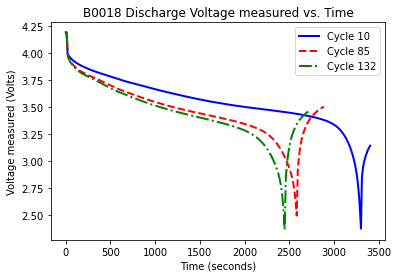

In [50]:
#Plot
# Filter data for each cycle 
cycle_10 = ds[ds['cycle_type'] == 10]
cycle_85 = ds[ds['cycle_type'] == 85]
cycle_132 = ds[ds['cycle_type'] == 132]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_132['Time'], cycle_132['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 132')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured (Volts)')
plt.title('B0018 Discharge Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [51]:
# Group the data by "cycle" and find the minimum voltage measured and its corresponding time
min_values = ds.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])

# Reset the index of the resulting DataFrame
min_values.reset_index(drop=True, inplace=True)

# Extract the minimum voltage measured and time values
min_voltages = min_values['Voltage_measured']
min_time = max_values['Time']

v12v13 = min_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v12v13.rename(columns={'type':'type_D', 'Voltage_measured':'Voltage_measured_D', 'Time':'Time_voltage_measured_D'}, inplace=True)
v12v13

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\1281439428.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_values = ds.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])


,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D
0,1,discharge,2.472161,3357.531
1,2,discharge,2.411438,3337.469
2,3,discharge,2.394396,3331.719
3,4,discharge,2.399948,3315.672
4,5,discharge,2.385146,3317.703
...,...,...,...,...
127,128,discharge,2.347109,2485.594
128,129,discharge,2.488429,2473.609
129,130,discharge,2.399218,2453.343
130,131,discharge,2.278634,2472.844


In [52]:
v12v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               132 non-null    int64  
 1   type_D                   132 non-null    object 
 2   Voltage_measured_D       132 non-null    float64
 3   Time_voltage_measured_D  132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB


## Current Measured vs Time - Discharge

In [53]:
cycle_list1 = np.arange(1,133).tolist()

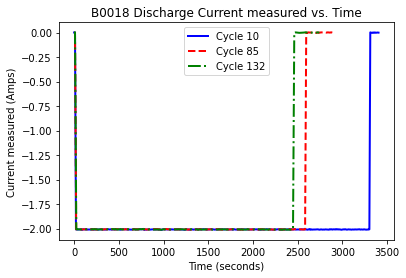

In [54]:
#Plot
# Filter data for each cycle 
cycle_10 = ds[ds['cycle_type'] == 10]
cycle_85 = ds[ds['cycle_type'] == 85]
cycle_132 = ds[ds['cycle_type'] == 132]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_132['Time'], cycle_132['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 132')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured (Amps)')
plt.title('B0018 Discharge Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v14v15 = pd.DataFrame(columns=['cycle_type', 'break_time'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds[ds['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v14v15.loc[idx,'cycle_type']=c
    v14v15.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v14v15.loc[idx,'Current measured']=cycle.query('index==@change_point_index').iloc[0,8]

v14v15.rename(columns={'break_time':'Time_current_measured_D', 'Current measured':'Current_measured_D'}, inplace = True)
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3338.438,-2.009503
1,2,3318.328,-2.008241
2,3,3341.5,-0.000933
3,4,3315.672,-2.012224
4,5,3288.188,-2.008263
...,...,...,...
127,128,2458.203,-2.009860
128,129,2459.875,-2.009199
129,130,2467.203,-0.000599
130,131,2472.844,-2.008021


In [56]:
#Change data type
v14v15['cycle_type'] = v14v15['cycle_type'].astype('int64')
v14v15['Time_current_measured_D'] = v14v15['Time_current_measured_D'].astype('float64')
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3338.438,-2.009503
1,2,3318.328,-2.008241
2,3,3341.500,-0.000933
3,4,3315.672,-2.012224
4,5,3288.188,-2.008263
...,...,...,...
127,128,2458.203,-2.009860
128,129,2459.875,-2.009199
129,130,2467.203,-0.000599
130,131,2472.844,-2.008021


In [57]:
v14v15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               132 non-null    int64  
 1   Time_current_measured_D  132 non-null    float64
 2   Current_measured_D       132 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.2 KB


## Temperature Measured vs Time - Discharge

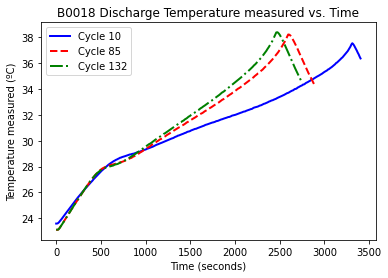

In [58]:
#Plot
# Filter data for each cycle 
cycle_10 = ds[ds['cycle_type'] == 10]
cycle_85 = ds[ds['cycle_type'] == 85]
cycle_132 = ds[ds['cycle_type'] == 132]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_132['Time'], cycle_132['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 132')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured (ºC)')
plt.title('B0018 Discharge Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [59]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
tm = ds[ds['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v16v17 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v16v17.rename(columns={'type':'type_D','Temperature_measured':'Temperature_measured_D','Time':'Time_temperature_measured_D'}, inplace=True)
v16v17

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\3212444164.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ds[ds['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_D,Temperature_measured_D,Time_temperature_measured_D
0,1,discharge,38.101803,3367.141
1,2,discharge,38.149880,3347.188
2,3,discharge,37.526691,3341.500
3,4,discharge,37.062792,3325.547
4,5,discharge,38.211035,3327.782
...,...,...,...,...
127,128,discharge,38.847490,2513.250
128,129,discharge,38.802834,2487.563
129,130,discharge,38.726991,2481.078
130,131,discharge,38.671920,2500.703


In [60]:
v16v17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   132 non-null    int64  
 1   type_D                       132 non-null    object 
 2   Temperature_measured_D       132 non-null    float64
 3   Time_temperature_measured_D  132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB


## Current at Charge vs time - Discharge

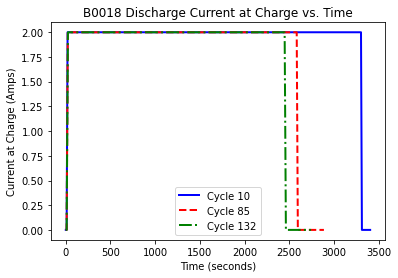

In [61]:
#not sure why the data displays the lines like this...
#Plot
# Filter data for each cycle 
cycle_10 = ds[ds['cycle_type'] == 10]
cycle_85 = ds[ds['cycle_type'] == 85]
cycle_132 = ds[ds['cycle_type'] == 132]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_132['Time'], cycle_132['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 132')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge (Amps)')
plt.title('B0018 Discharge Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v18v19 = pd.DataFrame(columns=['cycle_type','break_time', 'Current'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds[ds['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v18v19.loc[idx,'cycle_type']=c
    v18v19.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v18v19.loc[idx,'Current']=cycle.query('index==@change_point_index').iloc[0,10]

v18v19.rename(columns={'break_time':'Time_current_D', 'Current':'Current_D'},inplace=True)
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3338.438,1.999
1,2,3318.328,1.9988
2,3,3341.5,0.0006
3,4,3315.672,1.9988
4,5,3288.188,1.999
...,...,...,...
127,128,2458.203,1.9988
128,129,2459.875,1.9986
129,130,2467.203,0.0006
130,131,2472.844,1.9986


In [63]:
#Change data type
v18v19['cycle_type'] = v18v19['cycle_type'].astype('int64')
v18v19[['Time_current_D','Current_D']] = v18v19[['Time_current_D','Current_D']] .astype('float64')
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3338.438,1.9990
1,2,3318.328,1.9988
2,3,3341.500,0.0006
3,4,3315.672,1.9988
4,5,3288.188,1.9990
...,...,...,...
127,128,2458.203,1.9988
128,129,2459.875,1.9986
129,130,2467.203,0.0006
130,131,2472.844,1.9986


In [64]:
v18v19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      132 non-null    int64  
 1   Time_current_D  132 non-null    float64
 2   Current_D       132 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.2 KB


## Voltage at Charge - Discharge

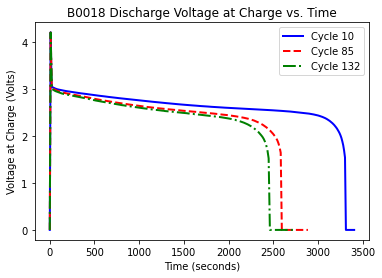

In [65]:
#Plot
# Filter data for each cycle 
cycle_10 = ds[ds['cycle_type'] == 10]
cycle_85 = ds[ds['cycle_type'] == 85]
cycle_132 = ds[ds['cycle_type'] == 132]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_132['Time'], cycle_132['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 132')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge (Volts)')
plt.title('B0018 Discharge Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [66]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ds[ds['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])


# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v20v21 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v20v21.rename(columns={'type':'type_D','Voltage':'Voltage_D','Time':'Time_voltage_D'}, inplace=True)
v20v21 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\3118195666.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ds[ds['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])


,cycle_type,type_D,Voltage_D,Time_voltage_D
0,1,discharge,0.0,3367.141
1,2,discharge,0.0,3347.188
2,3,discharge,0.0,3341.500
3,4,discharge,0.0,3325.547
4,5,discharge,0.0,3327.782
...,...,...,...,...
127,128,discharge,0.0,2499.437
128,129,discharge,0.0,2487.563
129,130,discharge,0.0,2467.203
130,131,discharge,0.0,2486.781


In [67]:
v20v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      132 non-null    int64  
 1   type_D          132 non-null    object 
 2   Voltage_D       132 non-null    float64
 3   Time_voltage_D  132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB


## Total discharge time

In [68]:
# Disharge Total Time
d_total_time = ds.groupby('cycle_type')['Time'].max()

td_tm = []

# Print the maximum time for each cycle
for cycle, d_total_time in d_total_time.items():
    Cycle = cycle
    d_total_time = d_total_time
    td_tm.append([Cycle,d_total_time])

td_t = pd.DataFrame(td_tm, columns=['cycle_type', 'Discharge Total Time'])

td_t

,cycle_type,Discharge Total Time
0,1,3434.891
1,2,3425.485
2,3,3410.375
3,4,3404.719
4,5,3417.641
...,...,...
127,128,2777.844
128,129,2781.125
129,130,2760.906
130,131,2753.250


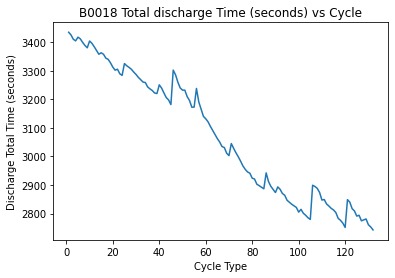

In [ ]:
#Plot
plt.plot(td_t['cycle_type'], td_t['Discharge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Discharge Total Time (seconds)')
plt.title('B0018 Total discharge Time (seconds) vs Cycle')
plt.show()

## Capacity -Discharge

In [ ]:
#View only one registry per cycle (discharge)
cap_ = ds.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap_

,cycle_type,type,Capacity
2816,1,discharge,1.855005
6959,2,discharge,1.843196
11014,3,discharge,1.839602
14976,4,discharge,1.830674
18856,5,discharge,1.832700
...,...,...,...
307967,128,discharge,1.362737
309601,129,discharge,1.363405
311208,130,discharge,1.351865
312876,131,discharge,1.354797


## All discharge variables

In [71]:
merge_= ['cycle_type'] 

In [72]:
adv = pd.merge(v12v13, v14v15[merge_ + ["Time_current_measured_D", "Current_measured_D"]], how = "outer", on="cycle_type")
adv = pd.merge(adv, v16v17[merge_ +['Temperature_measured_D', 'Time_temperature_measured_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v18v19[merge_ +['Current_D', 'Time_current_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v20v21[merge_ +['Voltage_D', 'Time_voltage_D']], how = "outer", on="cycle_type")
adv =pd.merge(adv, td_t[merge_ + ["Discharge Total Time"]], how = "outer", on="cycle_type")
adv['new_cycle_type'] = np.arange(1,133)

In [73]:
#Reorganize the columns
last_column = adv.pop(adv.columns[-1])
adv.insert(0, last_column.name, last_column)
adv

,new_cycle_type,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,discharge,2.472161,3357.531,3338.438,-2.009503,38.101803,3367.141,1.9990,3338.438,0.0,3367.141,3434.891
1,2,2,discharge,2.411438,3337.469,3318.328,-2.008241,38.149880,3347.188,1.9988,3318.328,0.0,3347.188,3425.485
2,3,3,discharge,2.394396,3331.719,3341.500,-0.000933,37.526691,3341.500,0.0006,3341.500,0.0,3341.500,3410.375
3,4,4,discharge,2.399948,3315.672,3315.672,-2.012224,37.062792,3325.547,1.9988,3315.672,0.0,3325.547,3404.719
4,5,5,discharge,2.385146,3317.703,3288.188,-2.008263,38.211035,3327.782,1.9990,3288.188,0.0,3327.782,3417.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,discharge,2.347109,2485.594,2458.203,-2.009860,38.847490,2513.250,1.9988,2458.203,0.0,2499.437,2777.844
128,129,129,discharge,2.488429,2473.609,2459.875,-2.009199,38.802834,2487.563,1.9986,2459.875,0.0,2487.563,2781.125
129,130,130,discharge,2.399218,2453.343,2467.203,-0.000599,38.726991,2481.078,0.0006,2467.203,0.0,2467.203,2760.906
130,131,131,discharge,2.278634,2472.844,2472.844,-2.008021,38.671920,2500.703,1.9986,2472.844,0.0,2486.781,2753.250


# All Variables

In [74]:
av = pd.merge(acv, adv, how = "outer", on = "new_cycle_type")

In [75]:
av

,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,1.470,...,3357.531,3338.438,-2.009503,38.101803,3367.141,1.9990,3338.438,0.0,3367.141,3434.891
1,2,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,1.479,...,3337.469,3318.328,-2.008241,38.149880,3347.188,1.9988,3318.328,0.0,3347.188,3425.485
2,3,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,1.507,...,3331.719,3341.500,-0.000933,37.526691,3341.500,0.0006,3341.500,0.0,3341.500,3410.375
3,4,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,1.478,...,3315.672,3315.672,-2.012224,37.062792,3325.547,1.9988,3315.672,0.0,3325.547,3404.719
4,5,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,1.479,...,3317.703,3288.188,-2.008263,38.211035,3327.782,1.9990,3288.188,0.0,3327.782,3417.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,1.459,...,2453.343,2467.203,-0.000599,38.726991,2481.078,0.0006,2467.203,0.0,2467.203,2760.906
130,131,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,1.474,...,2472.844,2472.844,-2.008021,38.671920,2500.703,1.9986,2472.844,0.0,2486.781,2753.250
131,132,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,1.441,...,2447.687,2406.250,-2.011370,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843
132,133,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,1.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# column with the name of the cell
av['Battery_id'] = "B0018"

In [79]:
#Reorganize the columns
last_column = av.pop(av.columns[-1])
av.insert(0, last_column.name, last_column)
av

,Battery_id,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,B0018,1,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,...,3357.531,3338.438,-2.009503,38.101803,3367.141,1.9990,3338.438,0.0,3367.141,3434.891
1,B0018,2,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,...,3337.469,3318.328,-2.008241,38.149880,3347.188,1.9988,3318.328,0.0,3347.188,3425.485
2,B0018,3,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,...,3331.719,3341.500,-0.000933,37.526691,3341.500,0.0006,3341.500,0.0,3341.500,3410.375
3,B0018,4,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,...,3315.672,3315.672,-2.012224,37.062792,3325.547,1.9988,3315.672,0.0,3325.547,3404.719
4,B0018,5,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,...,3317.703,3288.188,-2.008263,38.211035,3327.782,1.9990,3288.188,0.0,3327.782,3417.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,B0018,130,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,...,2453.343,2467.203,-0.000599,38.726991,2481.078,0.0006,2467.203,0.0,2467.203,2760.906
130,B0018,131,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,...,2472.844,2472.844,-2.008021,38.671920,2500.703,1.9986,2472.844,0.0,2486.781,2753.250
131,B0018,132,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,...,2447.687,2406.250,-2.011370,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843
132,B0018,133,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,...,2447.687,2406.250,-2.011370,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843


## Organise data to save as .xlsx

In [80]:
# drop columns from AV - No longer needed
av = av.drop(columns=['cycle_type_x','cycle_type_y'])

In [81]:
# relocate Capacity to the end of the dataframe
last_column = av.pop('Capacity')
av.insert(len(av.columns), last_column.name, last_column)
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity
0,B0018,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,1.470,...,3338.438,-2.009503,38.101803,3367.141,1.9990,3338.438,0.0,3367.141,3434.891,1.855005
1,B0018,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,1.479,...,3318.328,-2.008241,38.149880,3347.188,1.9988,3318.328,0.0,3347.188,3425.485,1.843196
2,B0018,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,1.507,...,3341.500,-0.000933,37.526691,3341.500,0.0006,3341.500,0.0,3341.500,3410.375,1.839602
3,B0018,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,1.478,...,3315.672,-2.012224,37.062792,3325.547,1.9988,3315.672,0.0,3325.547,3404.719,1.830674
4,B0018,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,1.479,...,3288.188,-2.008263,38.211035,3327.782,1.9990,3288.188,0.0,3327.782,3417.641,1.832700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,B0018,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,1.459,...,2467.203,-0.000599,38.726991,2481.078,0.0006,2467.203,0.0,2467.203,2760.906,1.351865
130,B0018,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,1.474,...,2472.844,-2.008021,38.671920,2500.703,1.9986,2472.844,0.0,2486.781,2753.250,1.354797
131,B0018,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,1.441,...,2406.250,-2.011370,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843,1.341051
132,B0018,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,1.468,...,2406.250,-2.011370,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843,1.354797


## SoH and RUL

In [83]:
cap1 = av[['new_cycle_type','Capacity']]
cap1

,new_cycle_type,Capacity
0,1,1.855005
1,2,1.843196
2,3,1.839602
3,4,1.830674
4,5,1.832700
...,...,...
129,130,1.351865
130,131,1.354797
131,132,1.341051
132,133,1.354797


In [84]:
cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2
cap1

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\2098264456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2


,new_cycle_type,Capacity,SoH
0,1,1.855005,0.927502
1,2,1.843196,0.921598
2,3,1.839602,0.919801
3,4,1.830674,0.915337
4,5,1.832700,0.916350
...,...,...,...
129,130,1.351865,0.675932
130,131,1.354797,0.677398
131,132,1.341051,0.670526
132,133,1.354797,0.677398


In [ ]:
# Define the range of numbers
start_number = 134 
end_number = 0     
step = -1         

# Create the column with the range of numbers
cap1['RUL'] = np.arange(start_number, end_number, step)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_244\2433694677.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['RUL'] = np.arange(start_number, end_number, step)


In [87]:
cap1

,new_cycle_type,Capacity,SoH,RUL
0,1,1.855005,0.927502,134
1,2,1.843196,0.921598,133
2,3,1.839602,0.919801,132
3,4,1.830674,0.915337,131
4,5,1.832700,0.916350,130
...,...,...,...,...
129,130,1.351865,0.675932,5
130,131,1.354797,0.677398,4
131,132,1.341051,0.670526,3
132,133,1.354797,0.677398,2


In [88]:
#Add SoH and RUL to av
av['SoH'] = cap1['SoH']
av['RUL'] = cap1['RUL']
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity,SoH,RUL
0,B0018,1,charge,4.202872,1090.812,615.828,1.515859,26.648851,1000.359,1.470,...,38.101803,3367.141,1.9990,3338.438,0.0,3367.141,3434.891,1.855005,0.927502,134
1,B0018,2,charge,4.201895,3555.328,3180.188,1.513445,28.630658,3451.813,1.479,...,38.149880,3347.188,1.9988,3318.328,0.0,3347.188,3425.485,1.843196,0.921598,133
2,B0018,3,charge,4.201918,3550.750,3178.188,1.514422,28.510311,3429.984,1.507,...,37.526691,3341.500,0.0006,3341.500,0.0,3341.500,3410.375,1.839602,0.919801,132
3,B0018,4,charge,4.202093,3404.391,3157.656,1.487504,27.947430,3391.531,1.478,...,37.062792,3325.547,1.9988,3315.672,0.0,3325.547,3404.719,1.830674,0.915337,131
4,B0018,5,charge,4.202265,3513.672,3126.344,1.516403,28.182350,3393.797,1.479,...,38.211035,3327.782,1.9990,3288.188,0.0,3327.782,3417.641,1.832700,0.916350,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,B0018,130,charge,4.203554,2425.235,1927.110,1.516242,28.841919,2217.719,1.459,...,38.726991,2481.078,0.0006,2467.203,0.0,2467.203,2760.906,1.351865,0.675932,5
130,B0018,131,charge,4.204756,2608.359,1936.125,1.482935,29.320361,2199.828,1.474,...,38.671920,2500.703,1.9986,2472.844,0.0,2486.781,2753.250,1.354797,0.677398,4
131,B0018,132,charge,4.203718,2486.968,1907.250,1.518581,29.368555,2165.250,1.441,...,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843,1.341051,0.670526,3
132,B0018,133,charge,4.203241,2556.312,1779.609,1.517406,28.313325,2195.156,1.468,...,38.371814,2475.703,1.9986,2406.250,0.0,2461.734,2742.843,1.354797,0.677398,2


# Save to excel

In [89]:
av.to_excel("AV_b018.xlsx", index=False)